# Trabajo Práctico N° 4
<br/>

## Curso de Especialización en Inteligencia Artificial
## Visión por computadora 1
<br/>

### Autor: Maximiliano Torti
### Fecha: 29/05/21
<br/>

#### Enunciado:<br/>
Para las imagenes suministradas:
1. Implementar un extractor de características LBP báscio (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imágen
3. Comparar los histogramas

<img src="img/cielo.png" style="width: 200px;float:left">
<img src="img/ladrillos1.png" style="width: 200px;float:left">
<img src="img/ladrillos2.png" style="width: 200px;float:left">
<img src="img/oveja1.png" style="width: 200px;float:left">
<img src="img/oveja2.png" style="width: 200px;float:left">
<img src="img/piedras1.png" style="width: 200px;float:left">
<img src="img/piedras2.png" style="width: 200px;float:left">


In [1]:
#Importamos librerías
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

import numpy as np
import pandas as pd
import cv2 as cv

In [2]:
#Cargamos las imágenes
cielo = cv.imread("img/cielo.png")
cielo_gray = cv.cvtColor(cielo, cv.COLOR_BGR2GRAY)

ladrillos1 = cv.imread("img/ladrillos1.png")
ladrillos1_gray = cv.cvtColor(ladrillos1, cv.COLOR_BGR2GRAY)

ladrillos2 = cv.imread("img/ladrillos2.png")
ladrillos2_gray = cv.cvtColor(ladrillos2, cv.COLOR_BGR2GRAY)

oveja1 = cv.imread("img/oveja1.png")
oveja1_gray = cv.cvtColor(oveja1, cv.COLOR_BGR2GRAY)

oveja2 = cv.imread("img/oveja2.png")
oveja2_gray = cv.cvtColor(oveja2, cv.COLOR_BGR2GRAY)

piedras1 = cv.imread("img/piedras1.png")
piedras1_gray = cv.cvtColor(piedras1, cv.COLOR_BGR2GRAY)

piedras2 = cv.imread("img/piedras2.png")
piedras2_gray = cv.cvtColor(piedras2, cv.COLOR_BGR2GRAY)

### Apartado 1

In [3]:
# Armamos la función para transformar a LBP
def lbp(img):
    """
    Calcula matriz LBP a partir de una imágen. No realiza padding por lo que descarta 
    primer y ultima fila y columna
    
    Args:
        img (numpy array): imagen en escala de grises
        
    Returns:
        numpy_array: matriz LBP
    """
    lbp_img=np.zeros(shape=(img.shape[0],img.shape[1]))
    for i in range(1,img.shape[0]-1): #rows
        for j in range(2,img.shape[1]-1): #columns
            lbp_img[i,j] = (img[i,j-1] >= img[i,j]) * 1 + \
                           (img[i+1,j-1] >= img[i,j]) * 2 + \
                           (img[i+1,j] >= img[i,j]) * 4 + \
                           (img[i+1,j+1] >= img[i,j]) * 8 + \
                           (img[i,j+1] >= img[i,j]) * 16 + \
                           (img[i-1,j+1] >= img[i,j]) * 32 + \
                           (img[i-1,j] >= img[i,j]) * 64 + \
                           (img[i-1,j-1] >= img[i,j]) * 128
    return lbp_img[1:-1,1:-1]

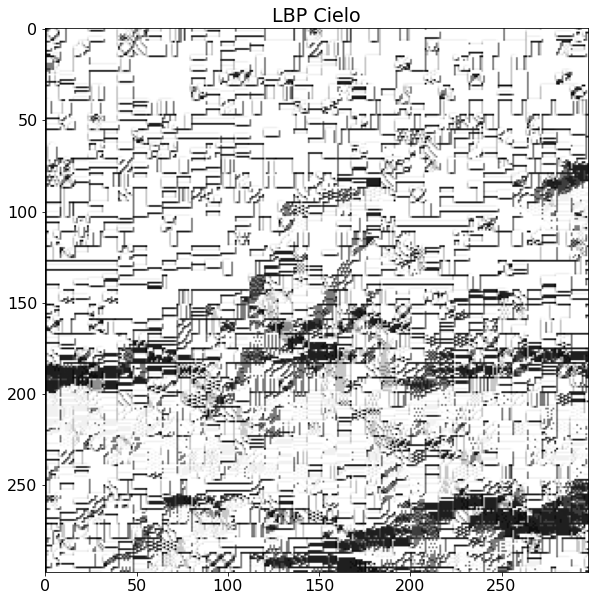

In [4]:
#Aplicamos la funcion para las diferentes imagenes
cielo_lbp=lbp(cielo_gray)
plt.figure(figsize=(10,10))
plt.imshow(cielo_lbp,cmap='gray')
plt.title("LBP Cielo")
plt.grid(False)
plt.show()

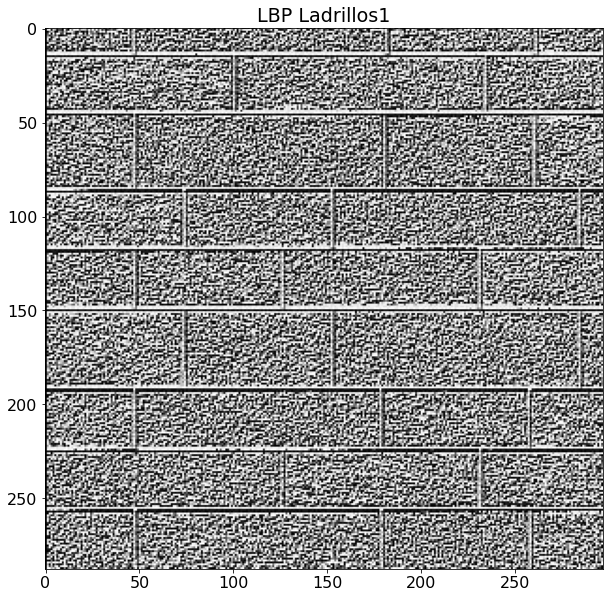

In [5]:
ladrillos1_lbp=lbp(ladrillos1_gray)
plt.figure(figsize=(10,10))
plt.imshow(ladrillos1_lbp,cmap='gray')
plt.title("LBP Ladrillos1")
plt.grid(False)
plt.show()

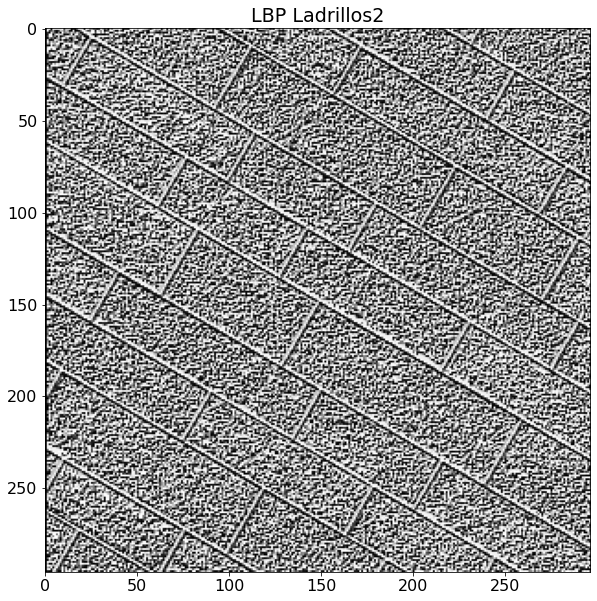

In [6]:
ladrillos2_lbp=lbp(ladrillos2_gray)
plt.figure(figsize=(10,10))
plt.imshow(ladrillos2_lbp,cmap='gray')
plt.title("LBP Ladrillos2")
plt.grid(False)
plt.show()

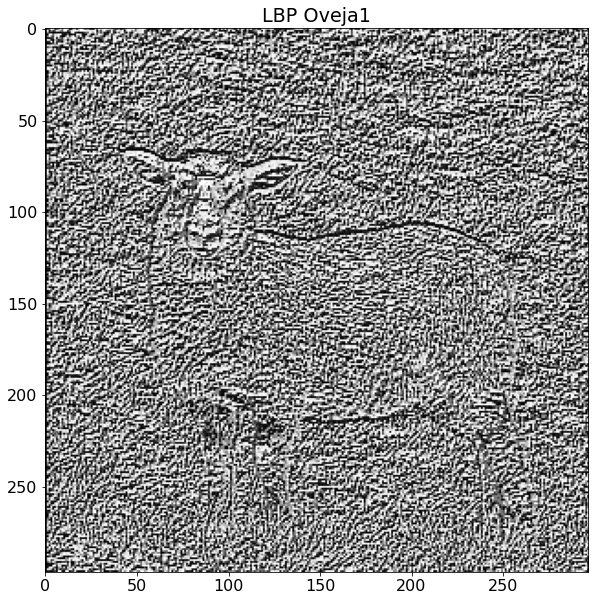

In [7]:
oveja1_lbp=lbp(oveja1_gray)
plt.figure(figsize=(10,10))
plt.imshow(oveja1_lbp,cmap='gray')
plt.title("LBP Oveja1")
plt.grid(False)
plt.show()

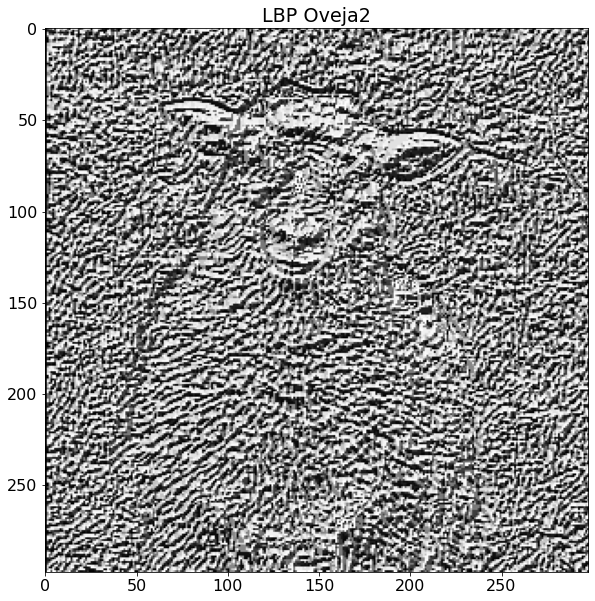

In [8]:
oveja2_lbp=lbp(oveja2_gray)
plt.figure(figsize=(10,10))
plt.imshow(oveja2_lbp,cmap='gray')
plt.title("LBP Oveja2")
plt.grid(False)
plt.show()

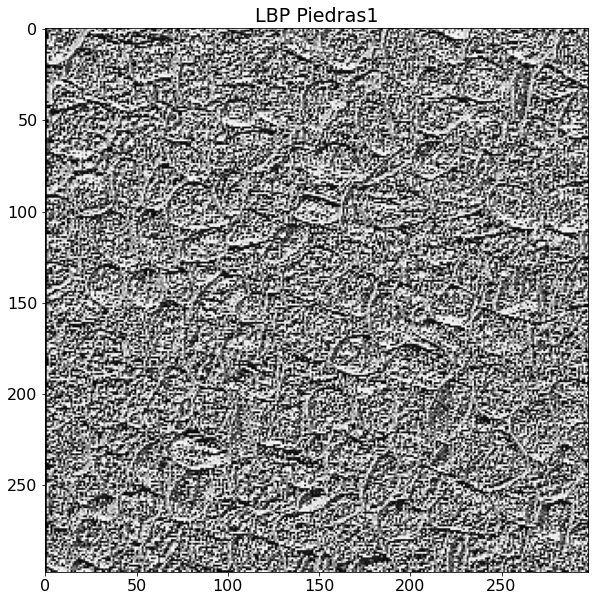

In [9]:
piedras1_lbp=lbp(piedras1_gray)
plt.figure(figsize=(10,10))
plt.imshow(piedras1_lbp,cmap='gray')
plt.title("LBP Piedras1")
plt.grid(False)
plt.show()

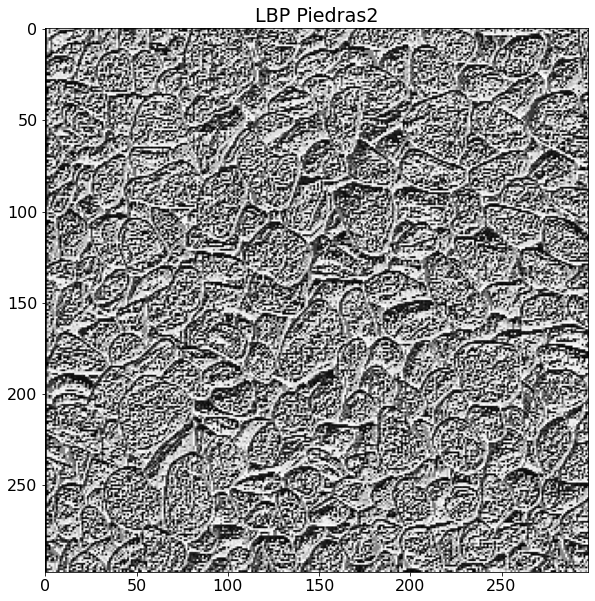

In [10]:
piedras2_lbp=lbp(piedras2_gray)
plt.figure(figsize=(10,10))
plt.imshow(piedras2_lbp,cmap='gray')
plt.title("LBP Piedras2")
plt.grid(False)
plt.show()

### Apartado 2

Generamos una variable bins configurable para poder generar histogramas de diferentes resoluciones y evaluar los resultados

In [11]:
bins=256

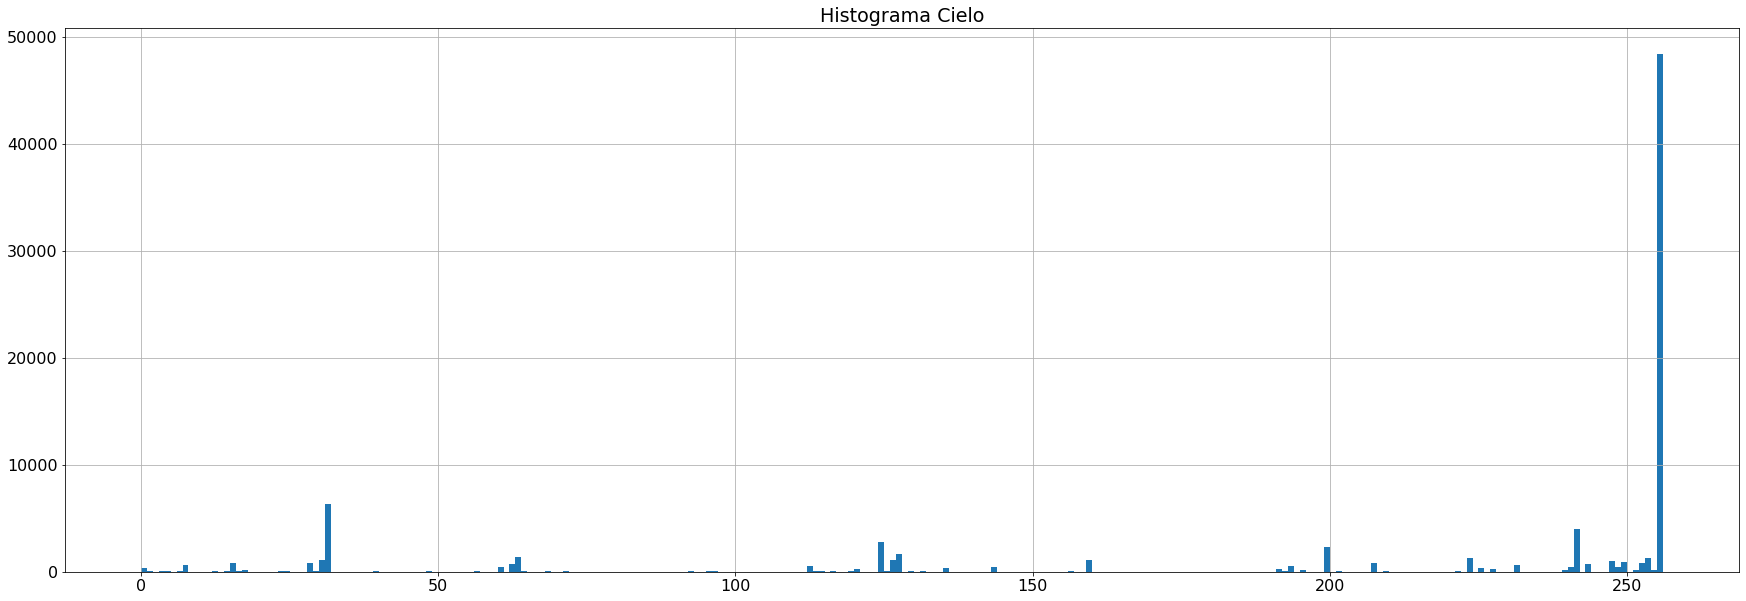

In [12]:
cielo_histogram=np.histogram(cielo_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(cielo_lbp.ravel(),bins=bins,range=(0,256)) 
plt.title("Histograma Cielo")
plt.grid(True)
plt.show()

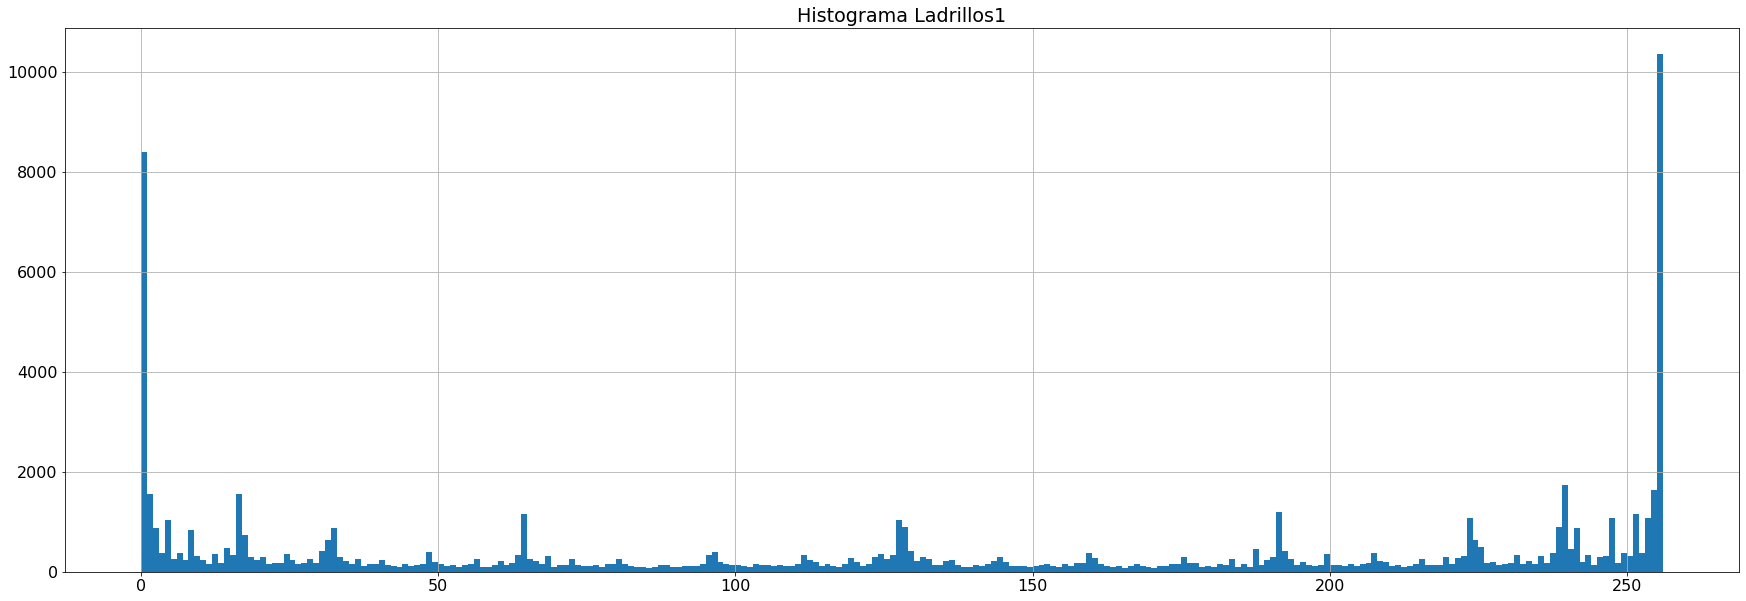

In [13]:
ladrillos1_histogram=np.histogram(ladrillos1_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(ladrillos1_lbp.ravel(),bins=bins,range=(0,256))
plt.title("Histograma Ladrillos1")
plt.grid(True)
plt.show()

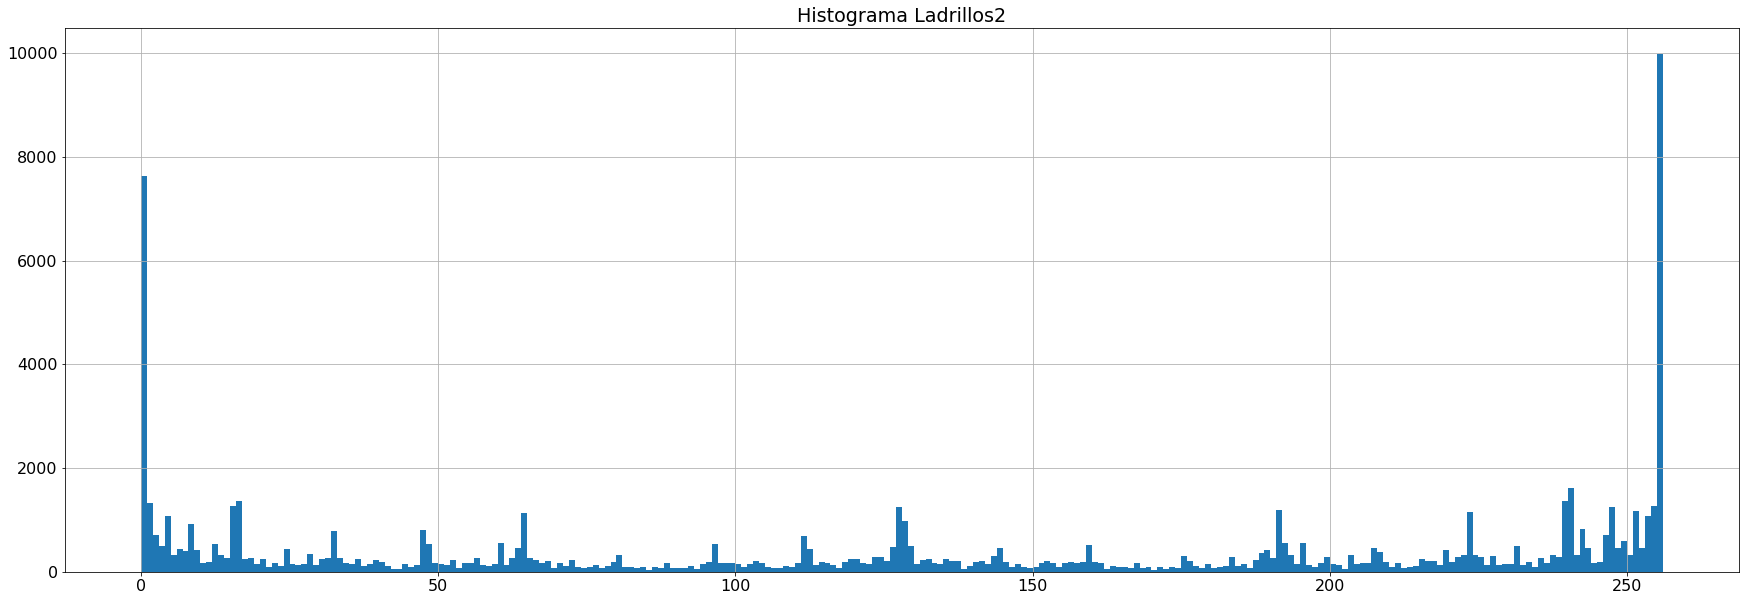

In [14]:
ladrillos2_histogram=np.histogram(ladrillos2_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(ladrillos2_lbp.ravel(),bins=bins,range=(0,256))
plt.title("Histograma Ladrillos2")
plt.grid(True)
plt.show()

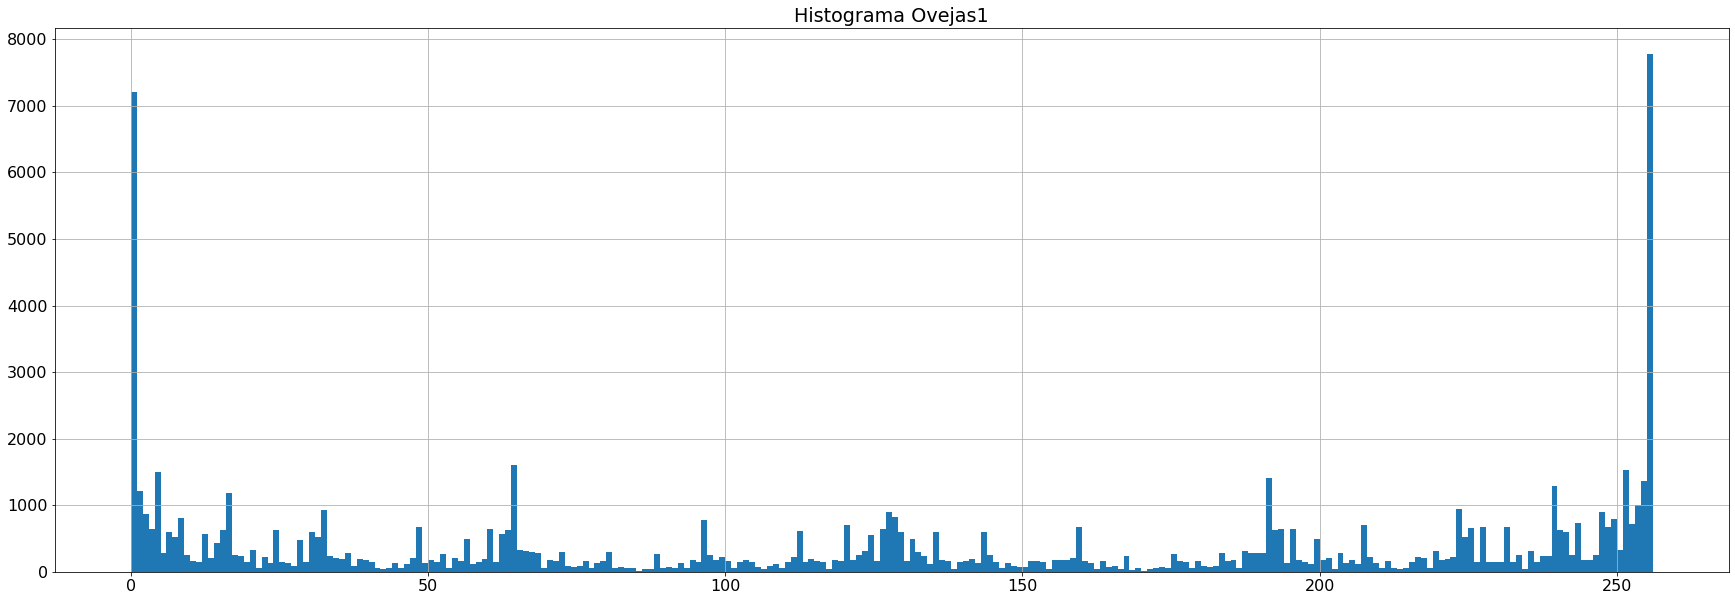

In [15]:
oveja1_histogram=np.histogram(oveja1_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(oveja1_lbp.ravel(),bins=bins,range=(0,256))
plt.title("Histograma Ovejas1")
plt.grid(True)
plt.show()

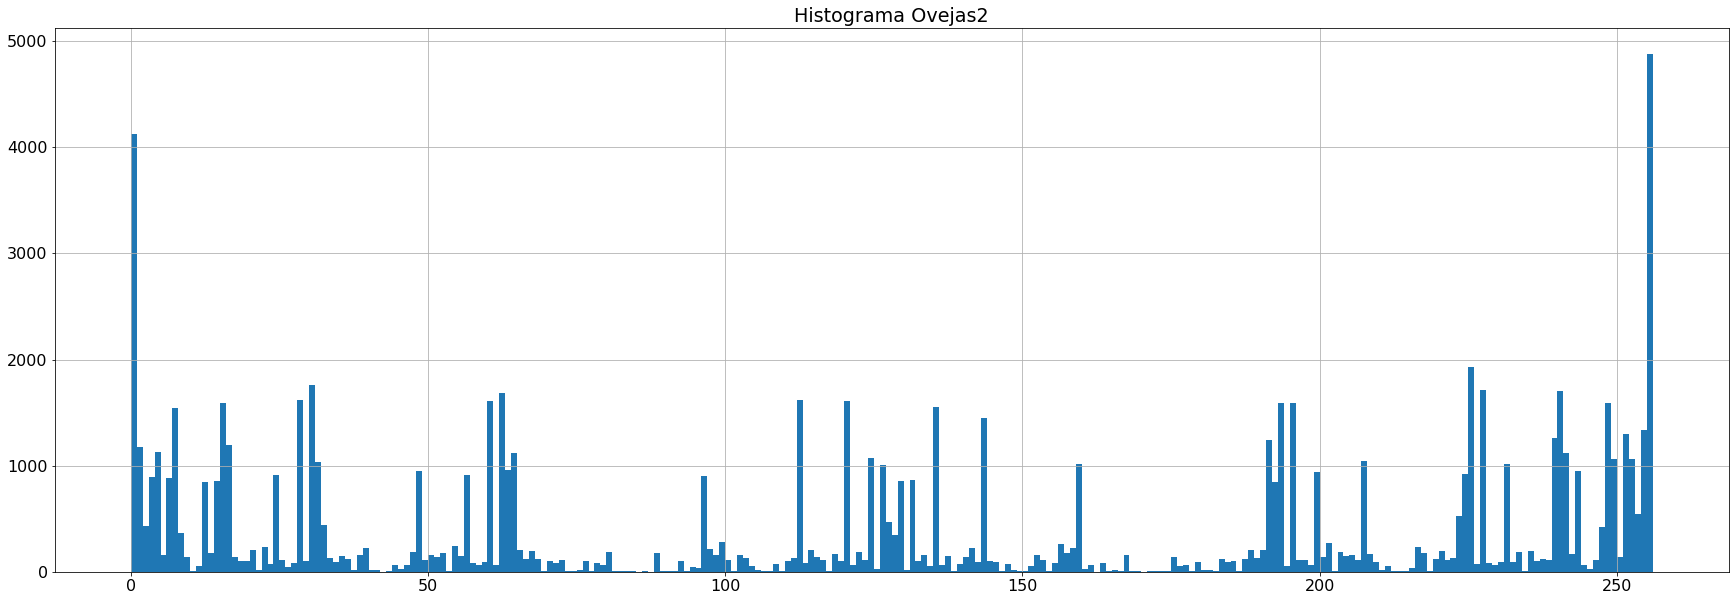

In [16]:
oveja2_histogram=np.histogram(oveja2_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(oveja2_lbp.ravel(),bins=bins,range=(0,256))
plt.title("Histograma Ovejas2")
plt.grid(True)
plt.show()

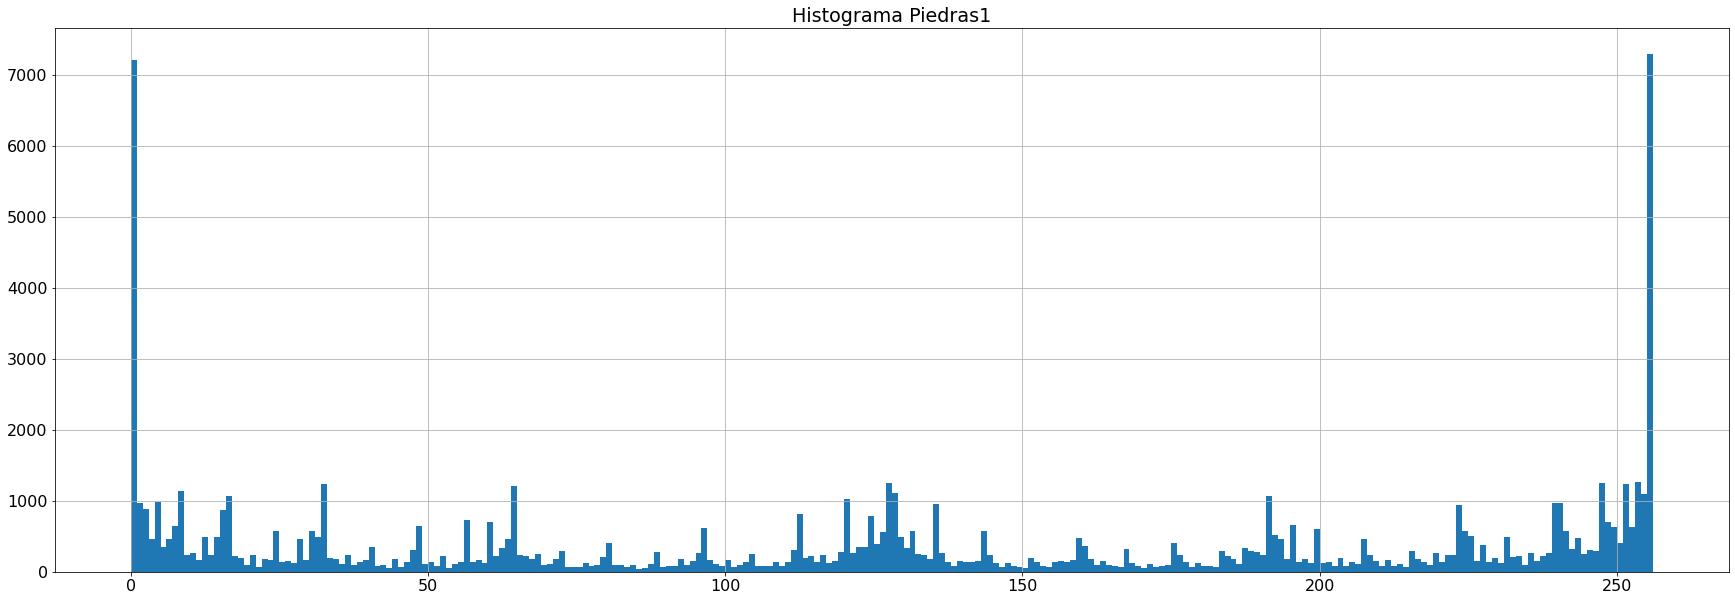

In [17]:
piedras1_histogram=np.histogram(piedras1_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(piedras1_lbp.ravel(),bins=bins,range=(0,256))
plt.title("Histograma Piedras1")
plt.grid(True)
plt.show()

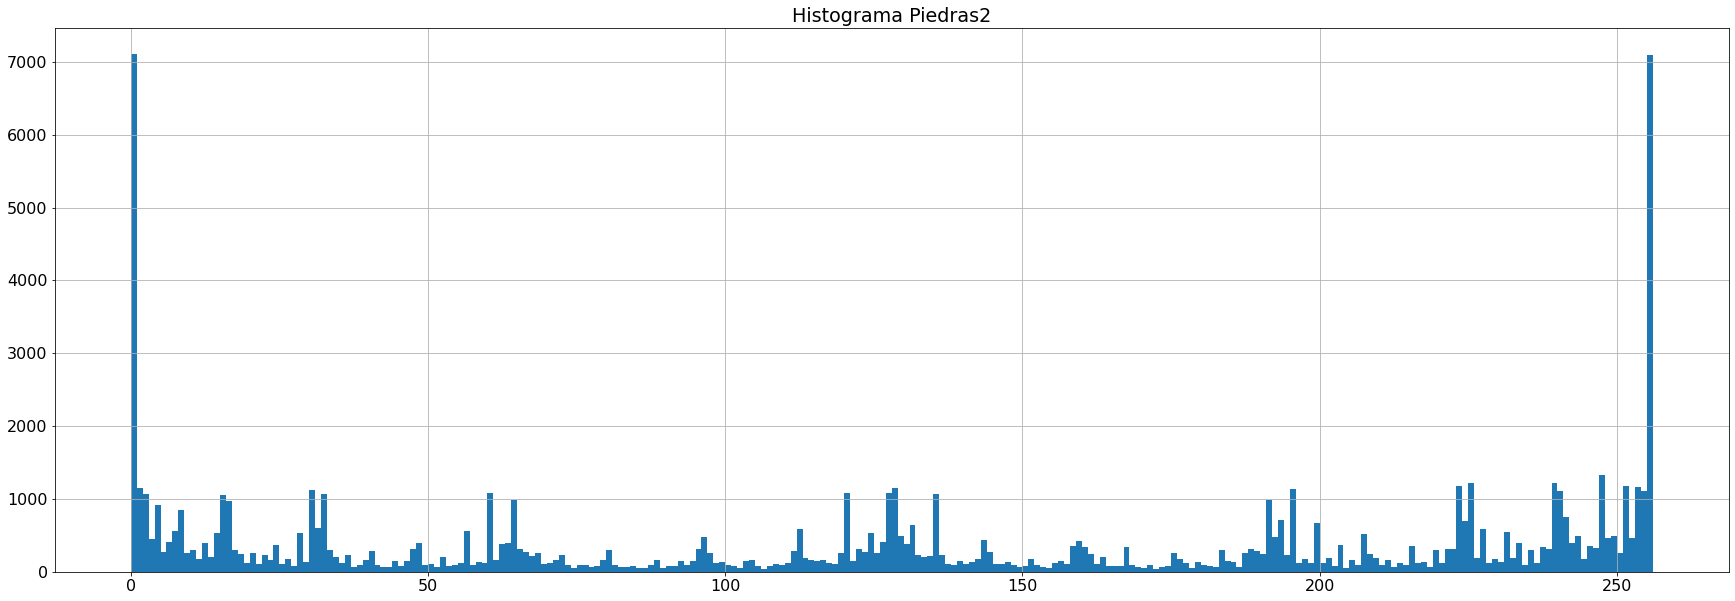

In [18]:
piedras2_histogram=np.histogram(piedras2_lbp.ravel(),bins=bins,range=(0,256))
plt.figure(figsize=(30,10))
plt.hist(piedras2_lbp.ravel(),bins=bins,range=(0,256))
plt.title("Histograma Piedras2")
plt.grid(True)
plt.show()

### Apartado 3

Al comparar las gráficas, notamos:

- El histograma del cielo es muy diferente al resto.
- Los histogramas de ladrillos1 y ladrillos2 tienen gran parecido entre si.
- Los histogramas de ovejas no guardan mucha similitud entre si.
- Los histogramas de piedras tienen gran parecido entre si.

Para corroborar, calculamos el RMSE entre los histogramas, de manera de contar con una métrica de comparación.


In [19]:
#Realizamos la tabla
pictures = ["Cielo", "Ladrillos1", "Ladrillos2", "Oveja1", "Oveja2", "Piedras1", "Piedras2"] 
data = [ [ "{:g}".format(np.linalg.norm(cielo_histogram[0]-cielo_histogram[0])),\
           "{:g}".format(np.linalg.norm(cielo_histogram[0]-ladrillos1_histogram[0])),\
           "{:g}".format(np.linalg.norm(cielo_histogram[0]-ladrillos2_histogram[0])),\
           "{:g}".format(np.linalg.norm(cielo_histogram[0]-oveja1_histogram[0])),\
           "{:g}".format(np.linalg.norm(cielo_histogram[0]-oveja2_histogram[0])),\
           "{:g}".format(np.linalg.norm(cielo_histogram[0]-piedras1_histogram[0])),\
           "{:g}".format(np.linalg.norm(cielo_histogram[0]-piedras2_histogram[0])),\
          ],
          [ "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-cielo_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-ladrillos1_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-ladrillos2_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-oveja1_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-oveja2_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-piedras1_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos1_histogram[0]-piedras2_histogram[0])),\
          ],
          [ "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-cielo_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-ladrillos1_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-ladrillos2_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-oveja1_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-oveja2_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-piedras1_histogram[0])),\
            "{:g}".format(np.linalg.norm(ladrillos2_histogram[0]-piedras2_histogram[0])),\
          ],
          [ "{:g}".format(np.linalg.norm(oveja1_histogram[0]-cielo_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja1_histogram[0]-ladrillos1_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja1_histogram[0]-ladrillos2_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja1_histogram[0]-oveja1_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja1_histogram[0]-oveja2_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja1_histogram[0]-piedras1_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja1_histogram[0]-piedras2_histogram[0])),\
          ],
          [ "{:g}".format(np.linalg.norm(oveja2_histogram[0]-cielo_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja2_histogram[0]-ladrillos1_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja2_histogram[0]-ladrillos2_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja2_histogram[0]-oveja1_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja2_histogram[0]-oveja2_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja2_histogram[0]-piedras1_histogram[0])),\
            "{:g}".format(np.linalg.norm(oveja2_histogram[0]-piedras2_histogram[0])),\
          ],
          [ "{:g}".format(np.linalg.norm(piedras1_histogram[0]-cielo_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras1_histogram[0]-ladrillos1_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras1_histogram[0]-ladrillos2_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras1_histogram[0]-oveja1_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras1_histogram[0]-oveja2_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras1_histogram[0]-piedras1_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras1_histogram[0]-piedras2_histogram[0])),\
          ],
          [ "{:g}".format(np.linalg.norm(piedras2_histogram[0]-cielo_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras2_histogram[0]-ladrillos1_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras2_histogram[0]-ladrillos2_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras2_histogram[0]-oveja1_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras2_histogram[0]-oveja2_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras2_histogram[0]-piedras1_histogram[0])),\
            "{:g}".format(np.linalg.norm(piedras2_histogram[0]-piedras2_histogram[0])),\
          ]
       ]
format_row = "{:>16}" * (len(pictures) + 1)
print(format_row.format("", *pictures))
for pic, row in zip(pictures, data):
    print(format_row.format(pic, *row))

                           Cielo      Ladrillos1      Ladrillos2          Oveja1          Oveja2        Piedras1        Piedras2
           Cielo               0         39966.7         40256.6         42209.7         44695.2         42638.3         42815.2
      Ladrillos1         39966.7               0         2662.28          3808.7          9590.1         4289.96         4612.08
      Ladrillos2         40256.6         2662.28               0         3346.45         8680.19         3615.03          4008.5
          Oveja1         42209.7          3808.7         3346.45               0         6413.48         1893.53         2388.51
          Oveja2         44695.2          9590.1         8680.19         6413.48               0         6515.02          6093.8
        Piedras1         42638.3         4289.96         3615.03         1893.53         6515.02               0          1667.1
        Piedras2         42815.2         4612.08          4008.5         2388.51          6093.8 

Observando los RMSE concluimos:
- Para el caso del cielo se encuentra bastante alejado del resto.
- La imagen de Ladrillos1 se encuentra mas cercano a Ladrillos2.
- La imagen de Oveja1 se encuentra mas cercana a Piedras1 lo cual es incorrecto.
- La imagen de Ovejas2 se encuentra cercana a Piedras2  y en menor medida a Oveja1/Piedras2.
- La imagen de Piedras1 y Piedras2 se encuentran muy cercanas entre si.

Esto valida la observación realizada sobre las gráficas de los histogramas

La performance en general se observa bastante "baja", la mayor diferencia se observó en el caso de las imágenes de las ovejas. Suponemos que esto se debe a que en ambas imagenes se encuentra en posiciones muy diferentes (de frente y de costado) y al gran ruido que debe producir el fondo de la imagen

La variacion del número de bins no parece tener un gran impacto en esta comparación

### Anexo
Comparación de histogramas mediante openCV. Varíamos también el numero de bins

In [20]:
bins=64

In [21]:
cv_cielo_hist = cv.calcHist([cielo_lbp.astype('uint8')],[0],None,[bins],[0,256]);
cv_ladrillos1_hist = cv.calcHist([ladrillos1_lbp.astype('uint8')],[0],None,[bins],[0,256]);
cv_ladrillos2_hist = cv.calcHist([ladrillos2_lbp.astype('uint8')],[0],None,[bins],[0,256]);
cv_oveja1_hist = cv.calcHist([oveja1_lbp.astype('uint8')],[0],None,[bins],[0,256]);
cv_oveja2_hist = cv.calcHist([oveja2_lbp.astype('uint8')],[0],None,[bins],[0,256]);
cv_piedras1_hist = cv.calcHist([piedras1_lbp.astype('uint8')],[0],None,[bins],[0,256]);
cv_piedras2_hist = cv.calcHist([piedras2_lbp.astype('uint8')],[0],None,[bins],[0,256]);

In [22]:
#Realizamos la tabla
pictures = ["Cielo", "Ladrillos1", "Ladrillos2", "Oveja1", "Oveja2", "Piedras1", "Piedras2"] 
data = [ [ "{:g}".format(cv.compareHist(cv_cielo_hist, cv_cielo_hist, 5)),\
           "{:g}".format(cv.compareHist(cv_cielo_hist, cv_ladrillos1_hist, 5)),\
           "{:g}".format(cv.compareHist(cv_cielo_hist, cv_ladrillos2_hist, 5)),\
           "{:g}".format(cv.compareHist(cv_cielo_hist, cv_oveja1_hist, 5)),\
           "{:g}".format(cv.compareHist(cv_cielo_hist, cv_oveja2_hist, 5)),\
           "{:g}".format(cv.compareHist(cv_cielo_hist, cv_piedras1_hist, 5)),\
           "{:g}".format(cv.compareHist(cv_cielo_hist, cv_piedras2_hist, 5)),\
          ],
          [ "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_cielo_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_ladrillos1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_ladrillos2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_oveja1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_oveja2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_piedras1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos1_hist, cv_piedras2_hist, 5)),\
          ],
          [ "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_cielo_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_ladrillos1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_ladrillos2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_oveja1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_oveja2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_piedras1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_ladrillos2_hist, cv_piedras2_hist, 5)),\
          ],
          [ "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_cielo_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_ladrillos1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_ladrillos2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_oveja1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_oveja2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_piedras1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja1_hist, cv_piedras2_hist, 5)),\
          ],
          [ "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_cielo_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_ladrillos1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_ladrillos2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_oveja1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_oveja2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_piedras1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_oveja2_hist, cv_piedras2_hist, 5)),\
          ],
          [ "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_cielo_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_ladrillos1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_ladrillos2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_oveja1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_oveja2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_piedras1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras1_hist, cv_piedras2_hist, 5)),\
          ],
          [ "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_cielo_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_ladrillos1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_ladrillos2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_oveja1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_oveja2_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_piedras1_hist, 5)),\
            "{:g}".format(cv.compareHist(cv_piedras2_hist, cv_piedras2_hist, 5)),\
          ],
       ]
format_row = "{:>16}" * (len(pictures) + 1)
print(format_row.format("", *pictures))
for pic, row in zip(pictures, data):
    print(format_row.format(pic, *row))

                           Cielo      Ladrillos1      Ladrillos2          Oveja1          Oveja2        Piedras1        Piedras2
           Cielo               0         88869.2         87921.7           90412         91419.4         92278.5         91470.3
      Ladrillos1          219811               0         171.723          1762.1         24333.5         1132.26         1745.95
      Ladrillos2          199103         5098.55               0         2838.06         21231.8         2216.97         3122.02
          Oveja1          186644         7354.94         3419.49               0         11996.1         1200.63         1722.29
          Oveja2          124433         31348.2         23373.5           12808               0         15866.2         12985.7
        Piedras1          224075         8044.94         4239.64         2508.54         18204.8               0         1355.94
        Piedras2          209497         8919.16         5470.22         2965.69         15717.9 

Al utilizar el método de comparación de histogramas de openCV con opción 5, notamos que los resultados son similares a los obtenidos previamente con RMSE.

También observamos que la precisión de comparación parece mejorar con menor cantidad de bins. Alrededor de los 64 bins se obtiene una perfomance aceptable